# Genre classification using 3 second audio features

**Vivek Vijayan**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/enter-opy/genre-classification/blob/main/notebooks/3sec_audiofeatures.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data preprocessing

In [2]:
df = pd.read_csv('../Data/features_3_sec.csv')
df = df.drop(columns=['filename', 'length'])
df.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,2.262437e+06,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,1.298320e+07,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [3]:
X = df.drop(columns=['label'])
y = np.array(df['label'].tolist()).reshape(-1, 1)

### Label encoding

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y.ravel())

### Train-test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
3968,0.429695,0.080298,0.107597,0.002132,2899.086357,3.993402e+05,2680.217154,63200.275507,6277.425631,1.084825e+06,...,9.204406,25.360561,-5.910776,38.360741,9.261896,51.293465,-8.257317,27.233856,4.519150,33.216763
2906,0.295804,0.084010,0.079329,0.000914,1817.903553,1.283493e+05,1735.250163,78534.969447,3529.954552,4.691552e+05,...,-4.934901,50.720455,-16.582851,65.195786,-5.791417,55.621944,-0.146587,78.598473,-8.479114,44.175518
7876,0.409537,0.093349,0.258735,0.014119,3511.078396,1.303529e+06,3206.772810,164030.027285,7379.180251,4.061167e+06,...,-3.360234,60.254230,-0.030380,90.001579,1.245210,42.383503,1.925118,33.888557,0.617312,38.626926
9037,0.332276,0.092360,0.217269,0.001353,1508.676790,3.654113e+05,1984.099963,92513.752802,3527.635592,1.571539e+06,...,3.629321,19.758045,-2.531855,29.841890,4.120367,29.424276,-7.113690,15.517057,-7.417427,30.048306
8214,0.438823,0.082806,0.192925,0.002630,2125.659015,1.753643e+05,2097.810111,73218.127114,4381.427096,9.666621e+05,...,13.232623,36.438354,-2.746804,37.613361,10.364799,45.619953,-2.086791,91.301056,0.746813,37.145710


### Normalization

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [9]:
accuracy = dict()

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = lr.predict(X_test)

In [12]:
accuracy['Logistic regression'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Logistic regression']:.2f}%")

Test Accuracy: 71.87%


## Support vector machine

In [13]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [14]:
y_pred = svm_clf.predict(X_test)

In [15]:
accuracy['Support vector machine'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Support vector machine']:.2f}%")

Test Accuracy: 86.89%


## Decision tree classifier

In [16]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt_clf.predict(X_test)

In [18]:
accuracy['Decision tree'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Decision tree']:.2f}%")

Test Accuracy: 63.56%


## k-nearest neighbors

In [19]:
max_accuracy = 0.0

for k in range(25):
    curr_knn_clf = KNeighborsClassifier(n_neighbors=k+1, metric='euclidean')
    curr_knn_clf.fit(X_train, y_train)

    y_pred = curr_knn_clf.predict(X_test)
    
    curr_accuracy = accuracy_score(y_test, y_pred) * 100

    if curr_accuracy > max_accuracy:
        best_k = k + 1
        max_accuracy = curr_accuracy
        knn_clf = curr_knn_clf

In [20]:
y_pred = knn_clf.predict(X_test)

In [21]:
accuracy['k-nearest neighbors'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['k-nearest neighbors']:.2f}% with k = {best_k }")

Test Accuracy: 90.09% with k = 1


## Artificial neural networks

In [22]:
ann_clf = MLPClassifier(hidden_layer_sizes=(200, 150), max_iter=1000)
ann_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 150), max_iter=1000)

In [23]:
y_pred = ann_clf.predict(X_test)

In [24]:
accuracy['Artificial neural network'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Artificial neural network']:.2f}%")

Test Accuracy: 88.89%


## Random forest (Ensemble methods)

In [25]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = rf_clf.predict(X_test)

In [27]:
accuracy['Random forest'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Random forest']:.2f}%")

Test Accuracy: 85.94%


## Results

In [28]:
df_accuracy = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])
df_accuracy

,Model,Accuracy
0,Logistic regression,71.871872
1,Support vector machine,86.886887
2,Decision tree,63.563564
3,k-nearest neighbors,90.090090
4,Artificial neural network,88.888889
5,Random forest,85.935936


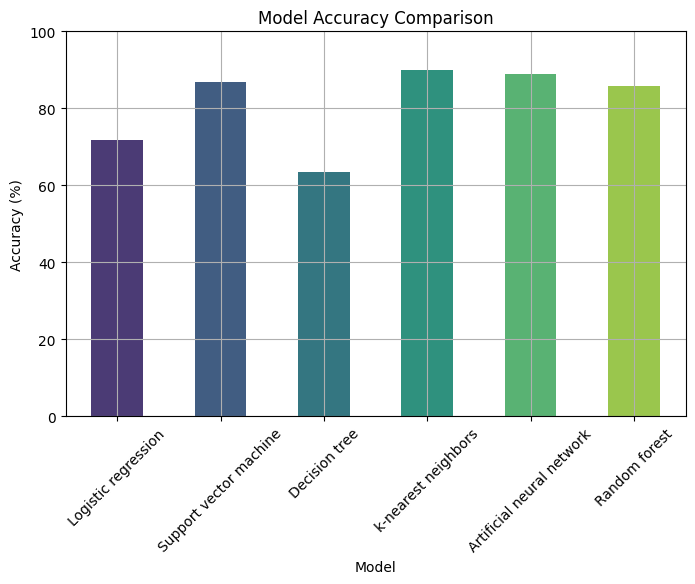

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, hue='Model', palette='viridis', width=0.5)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Discussion
- kNN performs the best for `k = 1` with `accuracy > 91%`, followed by ANN with `accuracy > 90%` for 3 sec audio features
- Decision trees performs the worse
- Overall performance has improved compared to 30 sec audio features